In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv(r"C:\Users\Abdur rahim nishad\Downloads\players_15.csv\players_15.csv")

In [3]:
pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [4]:
df.head()

,sofifa_id,player_url,short_name,long_name,age,dob,height_cm,weight_kg,nationality,club,overall,potential,value_eur,wage_eur,player_positions,preferred_foot,international_reputation,weak_foot,skill_moves,work_rate,body_type,real_face,release_clause_eur,player_tags,team_position,team_jersey_number,loaned_from,joined,contract_valid_until,nation_position,nation_jersey_number,pace,shooting,passing,dribbling,defending,physic,gk_diving,gk_handling,gk_kicking,gk_reflexes,gk_speed,gk_positioning,player_traits,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb
0,158023,https://sofifa.com/player/158023/lionel-messi/...,L. Messi,Lionel Andrés Messi Cuccittini,27,1987-06-24,169,67,Argentina,FC Barcelona,93,95,0,0,CF,Left,5,3,4,Medium/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #FK Specialist, #Acroba...",CF,10.0,NaN,2004-07-01,2018.0,CF,10.0,93.0,89.0,86.0,96.0,27.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,"Finesse Shot, Speed Dribbler (CPU AI Only), On...",84,94-3,71,89,85-5,96-1,89+2,90+4,76,96,96,90+2,94,94-2,95,80-1,73,77-1,60,88,48,22,92-1,90,76,NaN,25,21,20,6,11,15,14,8,89+3,89+3,89+3,92+3,90+3,90+3,90+3,92+3,92+3,92+3,92+3,90+3,79+3,79+3,79+3,90+3,62+3,62+3,62+3,62+3,62+3,54+3,45+3,45+3,45+3,54+3
1,20801,https://sofifa.com/player/20801/c-ronaldo-dos-...,Cristiano Ronaldo,Cristiano Ronaldo dos Santos Aveiro,29,1985-02-05,185,80,Portugal,Real Madrid,92,92,0,0,"LW, LM",Right,5,4,5,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",LW,7.0,NaN,2009-07-01,2018.0,LW,7.0,93.0,93.0,81.0,91.0,32.0,79.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Flair, Long Shot Taker (CPU A...",83,95+3,86,82,87+2,93+3,88,79,72,92-3,91,94,93,90,63-12,94,94,89,79,93,63,24,91+2,81,85,NaN,22,31,23,7,11,15,14,11,91+3,91+3,91+3,89+3,91+3,91+3,91+3,89+3,89+3,89+3,89+3,87+3,77+3,77+3,77+3,87+3,63+3,63+3,63+3,63+3,63+3,57+3,52+3,52+3,52+3,57+3
2,9014,https://sofifa.com/player/9014/arjen-robben/15...,A. Robben,Arjen Robben,30,1984-01-23,180,80,Netherlands,FC Bayern München,90,90,0,0,"RM, LM, RW",Left,5,2,4,High/Low,Normal,Yes,NaN,"#Speedster, #Dribbler, #Distance Shooter, #Acr...",SUB,10.0,NaN,2009-08-28,2017.0,RS,11.0,93.0,86.0,83.0,92.0,32.0,64.0,NaN,NaN,NaN,NaN,NaN,NaN,"Diver, Injury Prone, Avoids Using Weaker Foot,...",80,85+2,50,86+2,86+2,93,85,83-1,76+3,90+1,93,93+2,93+1,89+2,91,86,61,78+11,65,90+1,47+9,39+1,89+2,84+2,80+1,NaN,29,26+2,26+1,10,8,11,5,15,84+3,84+3,84+3,88+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,78+3,78+3,78+3,87+3,64+3,64+3,64+3,64+3,64+3,55+3,46+3,46+3,46+3,55+3
3,41236,https://sofifa.com/player/41236/zlatan-ibrahim...,Z. Ibrahimović,Zlatan Ibrahimović,32,1981-10-03,195,95,Sweden,Paris Saint-Germain,90,90,0,0,ST,Right,5,4,4,Medium/Low,Normal,Yes,NaN,"#Poacher, #Aerial Threat, #Distance Shooter, #...",ST,10.0,NaN,2012-07-01,2016.0,ST,10.0,76.0,91.0,81.0,86.0,34.0,86.0,NaN,NaN,NaN,NaN,NaN,NaN,"Power Free-Kick, Leadership, Flair, Long Shot ...",76,91,76,84-2,92+3,88,80,80,76+4,90,74+2,77-1,86,85,41,93,72,78,93,88,84,20,86,83-1,91,NaN,25,41-8,27,13,15,10,9,12,87+3,87+3,87+3,84+3,86+3,86+3,86+3,84+3,86+3,86+3,86+3,83+3,76+3,76+3,76+3,83+3,61+3,65+3,65+3,65+3,61+3,56+3,55+3,55+3,55+3,56+3
4,167495,https://sofifa.com/player/167495/manuel-neuer/...,M. Neuer,Manuel Neuer,28,1986-03-27,193,92,Germany,FC Bayern München,90,90,0,0,GK,Right,5,4,1,Medium/Medi

In [5]:
df.shape

(15465, 104)

<AxesSubplot:>

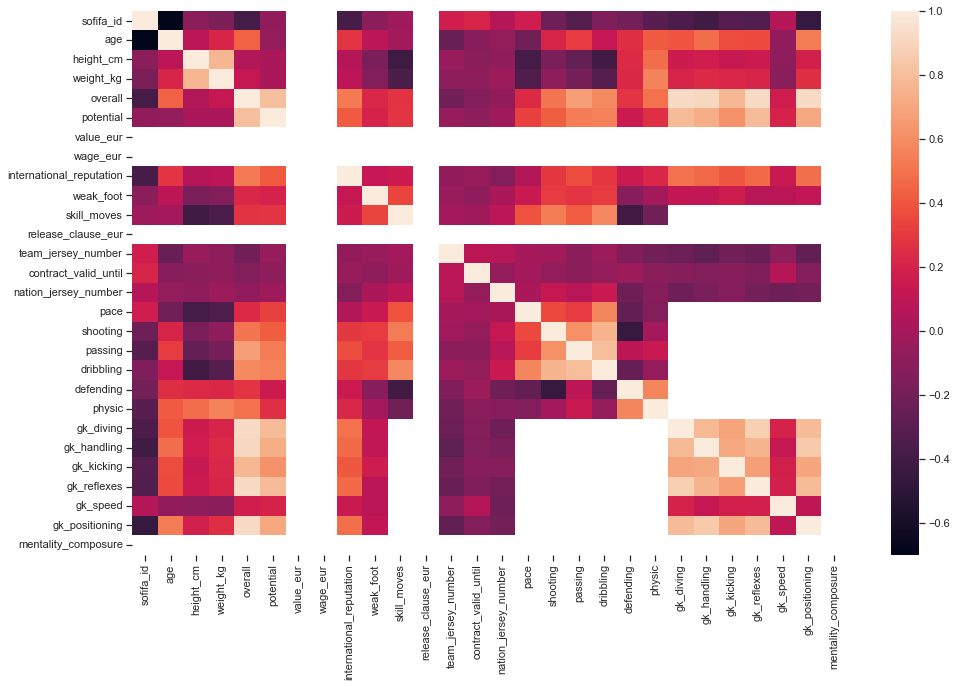

In [18]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr())


In [6]:
sns.set(style="ticks")
faltui=["#987432","#342343","#321344","#23d345","#434d32","#45434f"]

<AxesSubplot:>

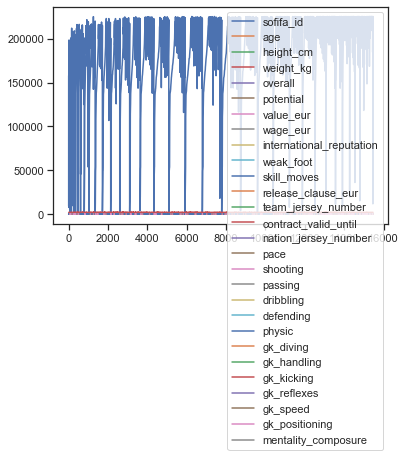

In [7]:
df.plot()

In [9]:
def convert(data, to):
    converted=None
    if to == 'array':
        if isinstance(data, np.array):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values
        elif isinstance(data, pd.DataFrame):
            converted = data.as_matrix()
        elif isinstance(data, list):
            converted = np.array(data)
            
    elif to == 'list':
        if isinstance(data, list):
            converted = data
        elif isinstance(data, pd.Series):
            converted = data.values.tolist()
        elif isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = np.tolist(data)
            
    elif to == 'dataframe':
        if isinstance(data, pd.DataFrame):
            converted = data
        elif isinstance(data, np.ndarray):
            converted = pd.DataFrame(data)
    else:
        raise ValueError("Unknown data conversion: {}".format(to))
    
    if converted is None:
            raise TypeError("cannot handle the data conversion type: {} to {}".format(type(data), to))
    else:
        return converted
            

In [ ]:
from collections import Counter
import math
from scipy import stats

In [ ]:
def conditional_entropy(x,y):
    """
    calculate the conditional entropy of x giver y:s(x|y)
    : param x: list/Numpy ndarry/pandas series 
    : param y: list/Numpy ndarry/pandas series 
    
    """
    y_counter=conter(y)
    xy_counter=counter(list(zip(x,y)))
    total_occurance=sum(y_counter.values())
    entropy=0.0
    for xy in xy_counter.keys():
        p_xy=xy_counter[xy]/total_occurance
        p_y=y_counter[xy[1]]/total_occurance
        entropy +=p_xy * math.log(p_y/p_xy)
    return entropy
    
    

In [ ]:
def cramers_v(x,y):
    counfusion_matrix=pd.crasstab(x,y)
    chi2= stats.chi2_contigency(confusion_matrix)[0]
    n=confusion_matrix.sum().sum()
    phi2=chi2/n
    phi2corr=max(0,phi2_((k-1)*(r-1))/(n-1))
    rcorr=r-((r-1)**2/(n-1))
    kcorr=k-((k1-1)**2/(n-1))
    
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [ ]:
def theilus_u(x,y):
    s_sy =condintional_entropy(x,y)
    x_counter=counter(x)
    total_occurances=sum(x_counter.values())
    p_x=list(map(lambda n:n/total_occurance,x_counter.values()))
    x_x=stats.entropy(p_x)
    if s_x ==0:
        return 1
    else:
        return (s_x -s_xy)/s_x